<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149451396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.7 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=3d537fd065ca95bfff3663c2b7b16f9f697940199210be92cd7b7c33c541809f
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.159123,1.818943,0.119266,1.897159,14.116446,12.508005,14.600489,17.559034,2.298456,0.637020,...,0.139147,4.185131,3.876547,3.966074,3.762880,0.430117,6.332517,0.455737,0.937316,0.000663
2014-11-25,12.044274,1.819092,0.119666,1.901584,14.118616,12.536687,14.638259,17.611218,2.300944,0.638980,...,0.138826,4.219929,3.877143,3.979317,3.763559,0.430446,6.363177,0.456440,0.940802,0.000661
2014-11-26,12.045147,1.818022,0.119895,1.907480,14.106437,12.535026,14.672645,17.641778,2.297993,0.640031,...,0.138706,4.223105,3.874862,3.999897,3.759411,0.430862,6.384158,0.456593,0.942125,0.000660
2014-11-27,12.057459,1.823927,0.119974,1.903085,14.143677,12.473238,14.664537,17.627140,2.303418,0.638720,...,0.139073,4.218970,3.885092,3.987279,3.769335,0.431604,6.411458,0.457798,0.944612,0.000662
2014-11-28,12.071798,1.828934,0.119480,1.908166,14.198605,12.428579,14.706606,17.675403,2.311027,0.640488,...,0.139819,4.241555,3.899966,3.997355,3.783470,0.432489,6.396344,0.458315,0.948534,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,13.841431,2.786765,0.144116,1.957706,21.831496,15.742543,24.039145,23.087372,2.982847,0.941125,...,0.077609,5.194265,5.997664,4.650045,5.822509,0.604918,0.771829,0.673666,0.596978,0.000896
2023-11-01,13.963441,2.786706,0.144543,1.954037,21.801539,15.751715,24.058630,23.074436,2.982307,0.935547,...,0.077379,5.162571,5.989434,4.639119,5.811574,0.603252,0.770141,0.672742,0.596159,0.000895
2023-11-02,13.976347,2.776042,0.144387,1.954017,21.719394,15.801605,24.010710,23.069321,2.969415,0.944167,...,0.076752,5.190439,5.966866,4.645462,5.792765,0.604660,0.766836,0.670207,0.593913,0.000892


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== ARS ========================================
2023-11-05 19:06:45,022 - Unknown integration target: 
2023-11-05 19:06:53,025 - Unknown integration target: 
2023-11-05 19:07:01,454 - Unknown integration target: 
2023-11-05 19:07:09,322 - Unknown integration target: 
2023-11-05 19:07:17,284 - Unknown integration target: 
2023-11-05 19:07:34,837 - Unknown integration target: 
2023-11-05 19:07:52,215 - Unknown integration target: 
2023-11-05 19:08:09,875 - Unknown integration target: 
2023-11-05 19:08:12,262 - Unknown integration target: 
2023-11-05 19:08:12,265 - Unknown integration target: 
2023-11-05 19:08:21,928 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 263.2 MiB
2023-11-05 19:08:21,931 - ApiComposer - Initial pipeline was fitted in 7.2 sec.
2023-11-05 19:08:21,935 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-05 19:43:02,822 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [34:40<?, ?gen/s]

2023-11-05 19:43:02,851 - ApiComposer - Hyperparameters tuning started with 23 min. timeout


2023-11-05 19:43:12,634 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, svr, glm, data_source_ts/ARS, ransac_non_lin_reg, ridge, lagged]}
ridge - {'alpha': 6.612890595915164}
svr - {}
glm - {'family': 'gamma', 'link': 'inverse_power'}
data_source_ts/ARS - {}
ransac_non_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
ridge - {'alpha': 2.6558546855705174}
lagged - {'window_size': 13.707624073305238} 
Initial metric: 0.000
  0%|          | 126/100000 [21:34<309:32:31, 11.16s/trial, best loss: 0.00032346421567469276]
2023-11-05 20:06:28,342 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, svr, glm, data_source_ts/ARS, ransac_non_lin_reg, ridge, lagged]}
ridge - {'alpha': 4.1440628117060765}
svr - {'C': 2.9329368202364288, 'epsilon': 0.31740929364423587, 'loss': 'epsilon_insensitive', 'tol': 0.03999974322224837}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/ARS - {}
ransac_non

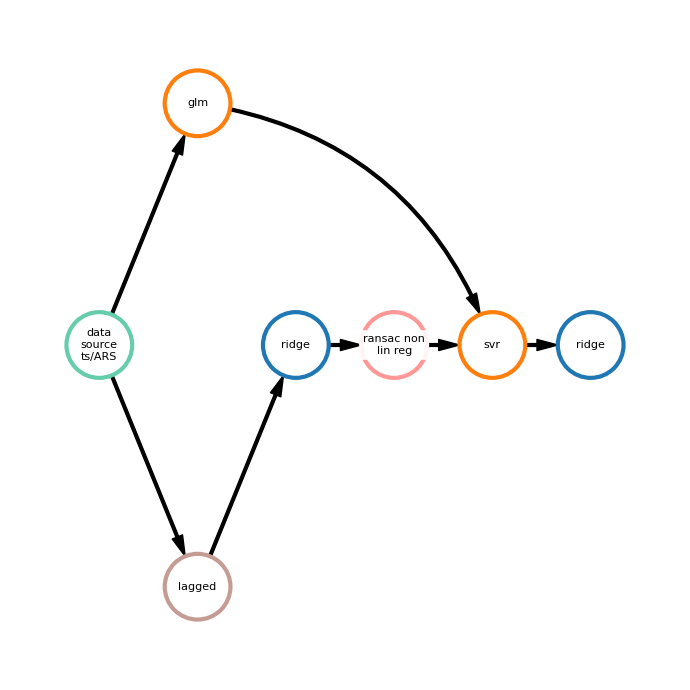

[0.18170825 0.18154997 0.18139247 0.18122982 0.18106897 0.18090879
 0.18075328]
{'mae': 0.001, 'mape': 0.006}


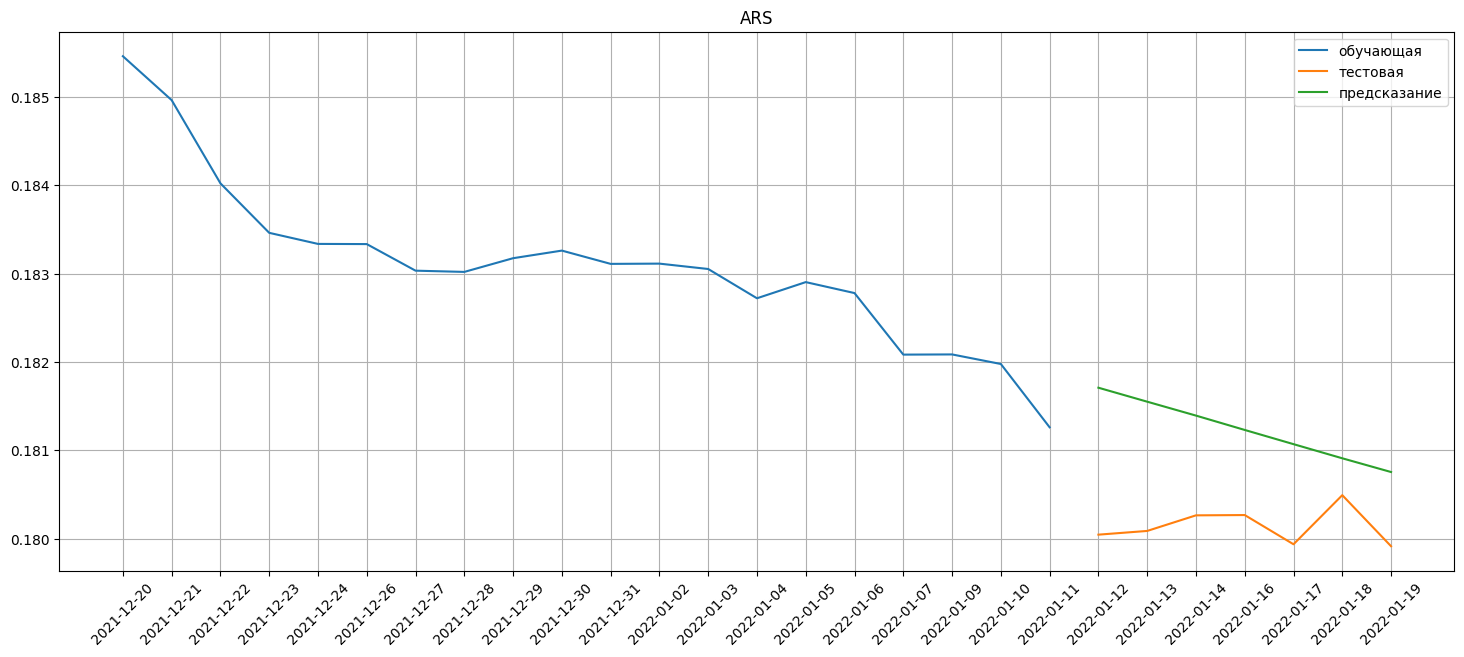


======================================== HUF ========================================
2023-11-05 20:07:25,215 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.5 MiB
2023-11-05 20:07:25,220 - ApiComposer - Initial pipeline was fitted in 9.2 sec.
2023-11-05 20:07:25,224 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-05 20:07:25,260 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 18 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'arima', 'ts_naive_average', 'cut', 'diff_filter', 'ar', 'ets', 'smoothing', 'locf', 'sparse_lagged', 'clstm', 'lagged', 'glm', 'stl_arima', 'gaussian_filter', 'ar', 'ets', 'isolation_forest_reg', 'lagged', 'rfr', 'dtreg', 'linear', 'fast_ica', 'exog_ts', 'diff_filter', 'pca', 'sparse_lagged', 'stl_arima', 'smoothing', 'ransac_lin_reg', 'arima', 'sgdr', 'lasso', 'adareg', 'cut', 'ransac_non_li

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-05 20:17:53,448 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [10:28<?, ?gen/s]

2023-11-05 20:17:53,497 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-05 20:18:09,201 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 4, 'nodes': [adareg, ransac_non_lin_reg, lagged, data_source_ts/HUF]}
adareg - {'learning_rate': 0.49022045124487085, 'loss': 'exponential'}
ransac_non_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
lagged - {'window_size': 3.8206615094651593}
data_source_ts/HUF - {} 
Initial metric: 0.000
  0%|          | 8/100000 [07:04<1684:50:34, 60.66s/trial, best loss: 0.0003224922166733766]
2023-11-05 20:25:44,900 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 4, 'nodes': [adareg, ransac_non_lin_reg, lagged, data_source_ts/HUF]}
adareg - {'learning_rate': 0.49022045124487085, 'loss': 'exponential'}
ransac_non_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
lagged - {'window_size': 3.8206615094651593}
data_source_ts/HUF - {}
2023-11-05 20:25:44,903 - PipelineTuner - Final metric: 0.000
2023-11-05 20:25:44,908 - 

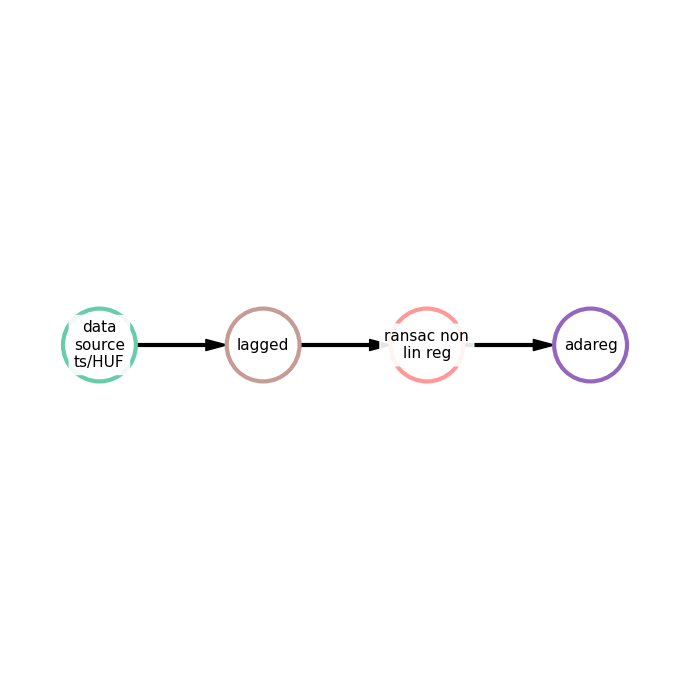

[0.06052936 0.06051058 0.0602733  0.06032868 0.06035015 0.06039335
 0.06038674 0.06041564]
{'mae': 0.001, 'mape': 0.009}


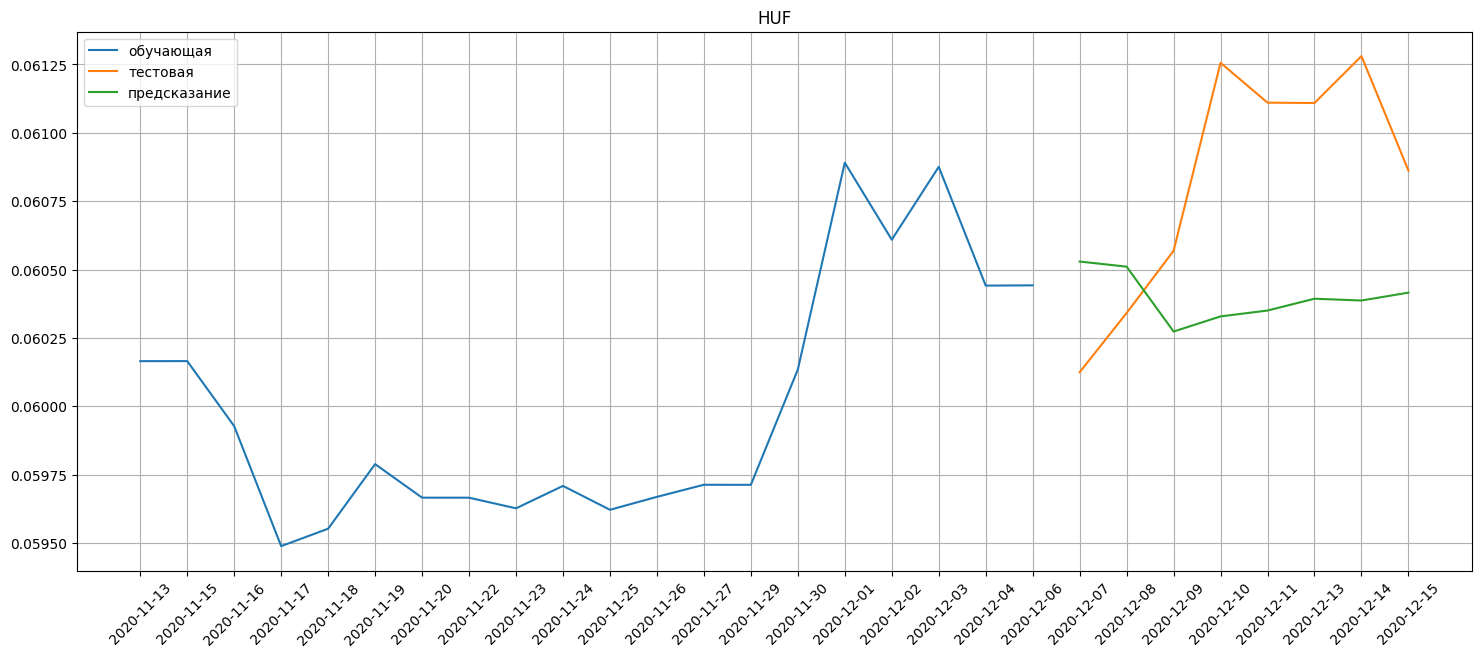


======================================== JPY ========================================
2023-11-05 20:27:06,389 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.4 MiB
2023-11-05 20:27:06,395 - ApiComposer - Initial pipeline was fitted in 18.9 sec.
2023-11-05 20:27:06,401 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 20:27:06,437 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'cut', 'diff_filter', 'ar', 'ets', 'locf', 'smoothing', 'sparse_lagged', 'lagged', 'glm', 'ts_naive_average', 'gaussian_filter', 'ransac_lin_reg', 'sgdr', 'lasso', 'adareg', 'cut', 'ar', 'ets', 'lagged', 'ransac_non_lin_reg', 'glm', 'rfr', 'polyfit', 'linear', 'dtreg', 'normalization', 'ts_naive_average', 'diff_filter', 'locf', 'pca', 'sparse_lagged', 'scaling', 'ridge', 'smoothing'].
2023-11-05

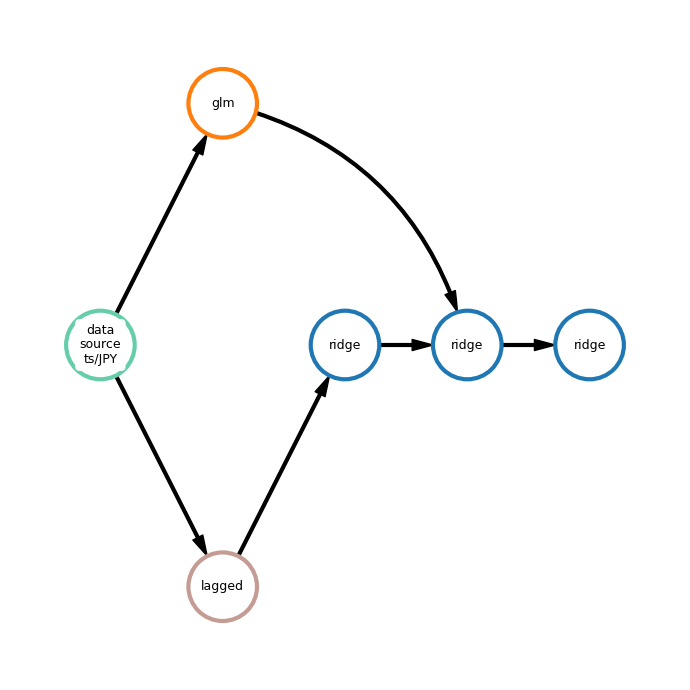

[0.14972332 0.14974296 0.14976254 0.14978152 0.1497999  0.14981711
 0.14983496 0.14985234 0.14986966 0.14988577 0.14990117 0.14991798
 0.14993482 0.14995179]
{'mae': 0.004, 'mape': 0.024}


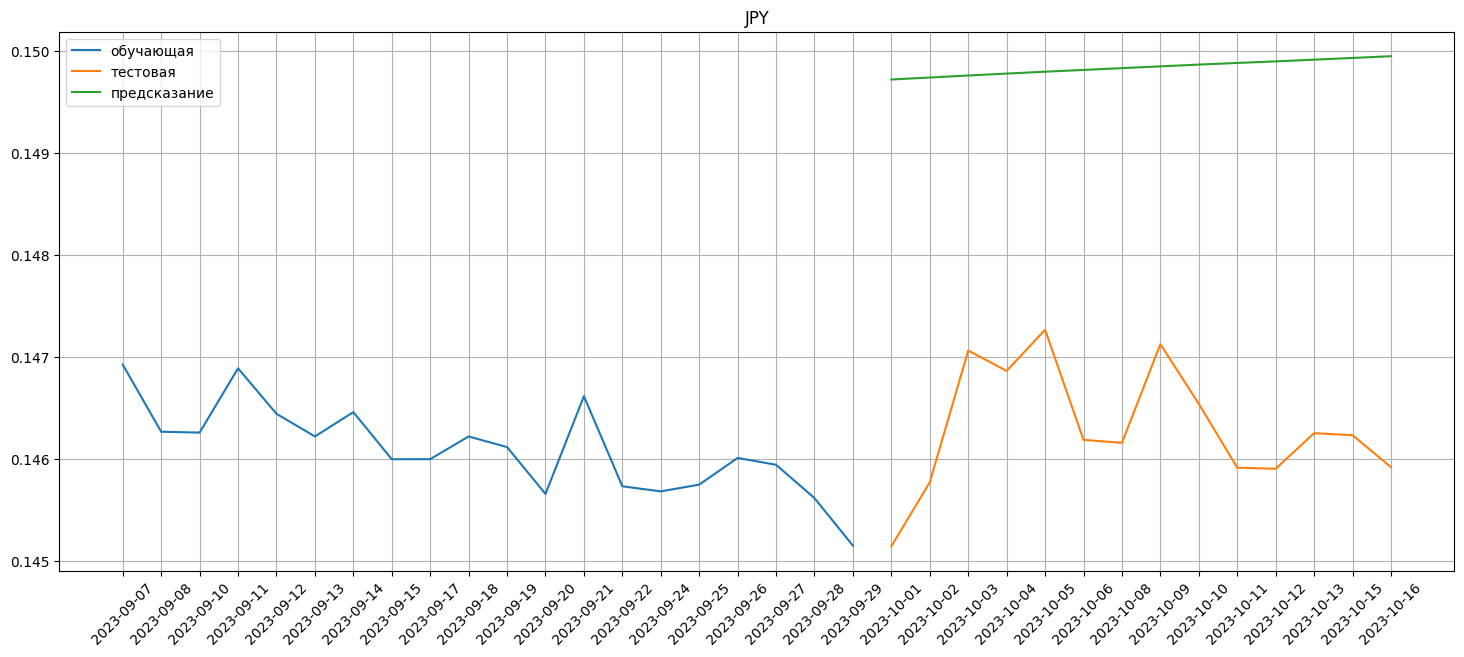


======================================== JPY ========================================
2023-11-05 20:31:02,184 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-05 20:31:02,189 - ApiComposer - Initial pipeline was fitted in 11.1 sec.
2023-11-05 20:31:02,193 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-05 20:31:02,223 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 57 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'arima', 'ts_naive_average', 'cut', 'diff_filter', 'ar', 'ets', 'smoothing', 'locf', 'sparse_lagged', 'clstm', 'lagged', 'glm', 'stl_arima', 'gaussian_filter', 'ar', 'ets', 'isolation_forest_reg', 'lagged', 'rfr', 'dtreg', 'linear', 'fast_ica', 'exog_ts', 'diff_filter', 'pca', 'sparse_lagged', 'stl_arima', 'smoothing', 'ransac_lin_reg', 'arima', 'sgdr', 'lasso', 'adareg', 'cut', 'ransac_non_l

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-05 21:05:26,572 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [34:24<?, ?gen/s]

2023-11-05 21:05:26,607 - ApiComposer - Hyperparameters tuning started with 22 min. timeout


2023-11-05 21:06:40,209 - PipelineTuner - Initial pipeline: {'depth': 11, 'length': 12, 'nodes': [dtreg, lgbmreg, ridge, ridge, glm, data_source_ts/JPY, ridge, lagged, linear, ransac_lin_reg, linear, decompose]}
dtreg - {}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/JPY - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
ransac_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 15/100000 [08:38<2878:07:40, 103.63s/trial, best loss: 0.0005597628213246918]
2023-11-05 21:29:34,231 - PipelineTuner - Final pipeline: {'depth': 11, 'length': 12, 'nodes': [dtreg, lgbmreg, ridge, ridge, glm, data_source_ts/JPY, ridge, lagged, linear, ransac_lin_reg, linear, decompose]}
dtreg - {}
lgbmreg - {'num_leaves':

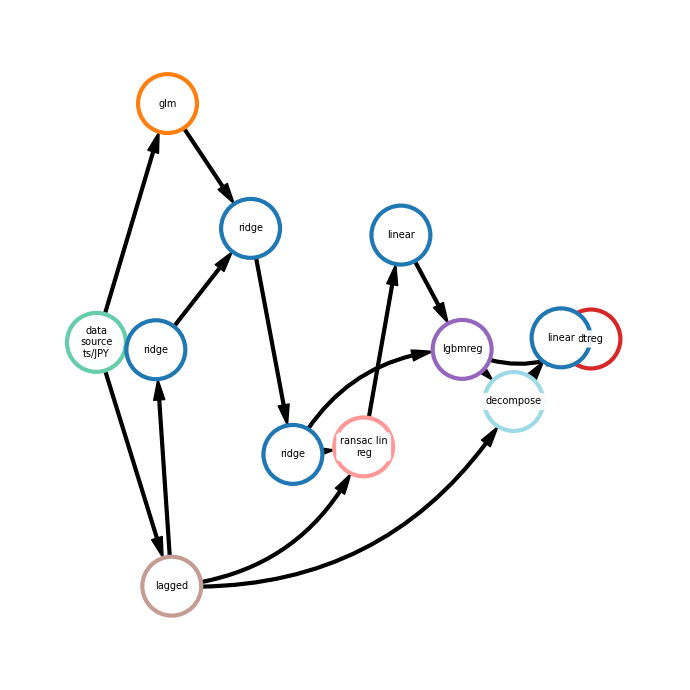

[0.16385568 0.16385372 0.16452348]
{'mae': 0.001, 'mape': 0.007}


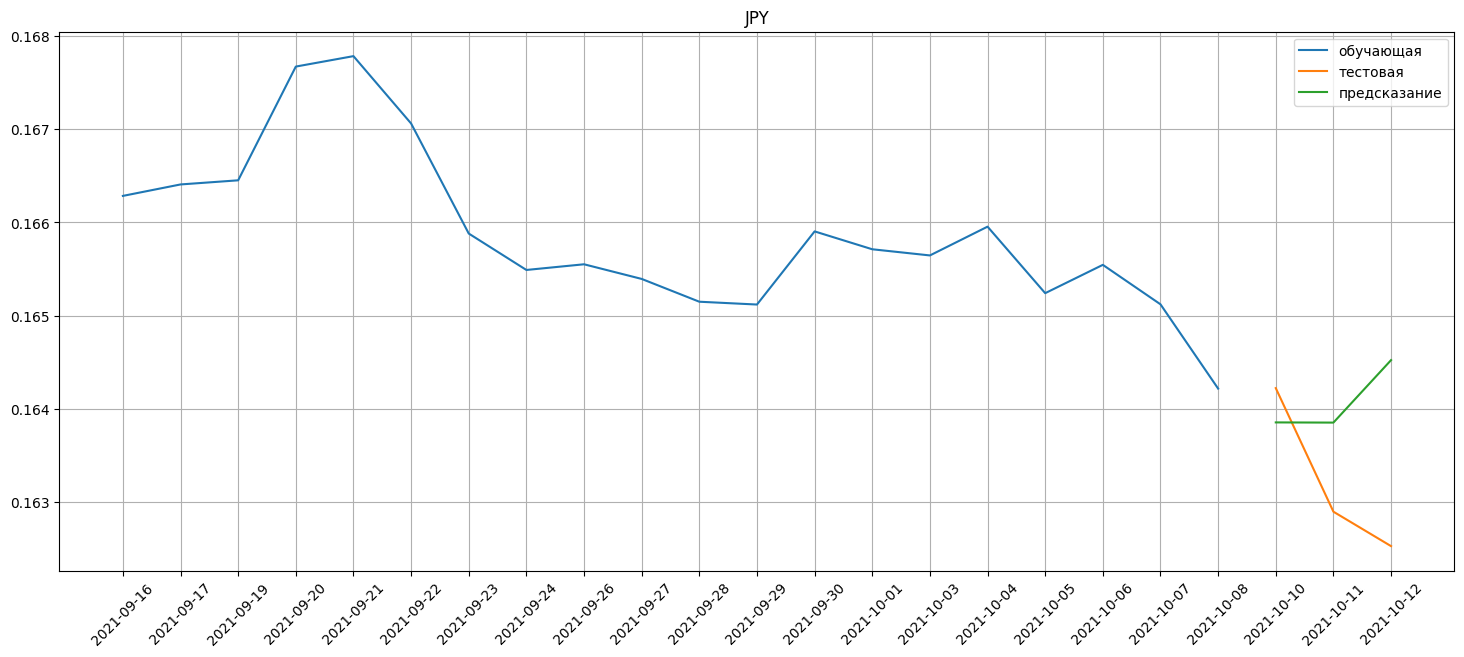


======================================== PKR ========================================
2023-11-05 21:31:54,298 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 1.8 MiB
2023-11-05 21:31:54,304 - ApiComposer - Initial pipeline was fitted in 16.2 sec.
2023-11-05 21:31:54,308 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-05 21:31:54,353 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 41 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'arima', 'ts_naive_average', 'cut', 'diff_filter', 'ar', 'ets', 'smoothing', 'locf', 'sparse_lagged', 'clstm', 'lagged', 'glm', 'stl_arima', 'gaussian_filter', 'ar', 'ets', 'isolation_forest_reg', 'lagged', 'rfr', 'dtreg', 'linear', 'fast_ica', 'exog_ts', 'diff_filter', 'pca', 'sparse_lagged', 'stl_arima', 'smoothing', 'ransac_lin_reg', 'arima', 'sgdr', 'lasso', 'adareg', 'cut', 'ransac_non_l

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-05 21:56:08,360 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [24:13<?, ?gen/s]

2023-11-05 21:56:08,392 - ApiComposer - Hyperparameters tuning started with 16 min. timeout


2023-11-05 21:56:36,676 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [gbr, ridge, ridge, glm, data_source_ts/PKR, lgbmreg, lagged, linear, decompose]}
gbr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PKR - {}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.001
  0%|          | 25/100000 [10:50<1204:21:13, 43.37s/trial, best loss: 0.0006294203633067613]
2023-11-05 22:13:26,251 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [gbr, ridge, ridge, glm, data_source_ts/PKR, lgbmreg, lagged, linear, decompose]}
gbr - {'alpha': 0.8182901069891164, 'learning_rate': 0.13161721296749987, 'loss': 'huber', 'max_depth': 9, 'max_features': 0.7065090233357039, 'min_samples_leaf': 9, 'min_samples_split': 2, 'subsample': 0.5806488665466423}
ridge - {'

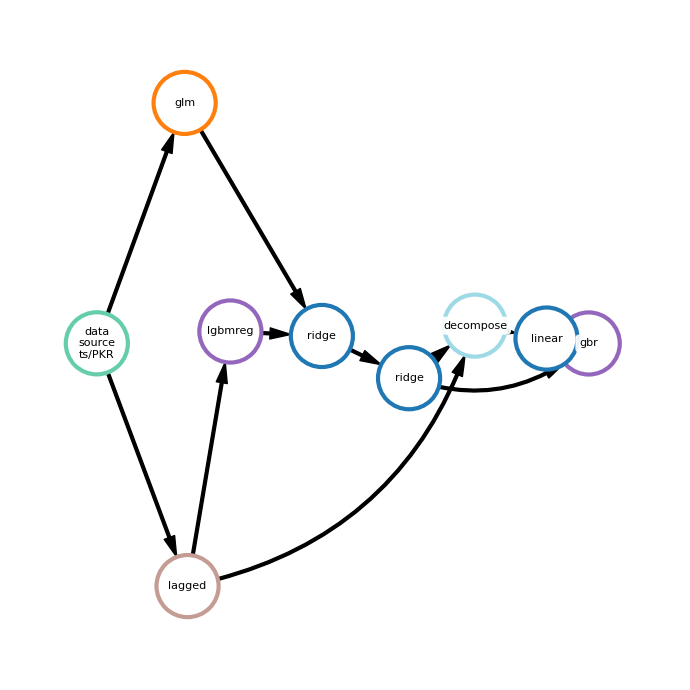

[0.11422516 0.11446059]
{'mae': 0.0, 'mape': 0.001}


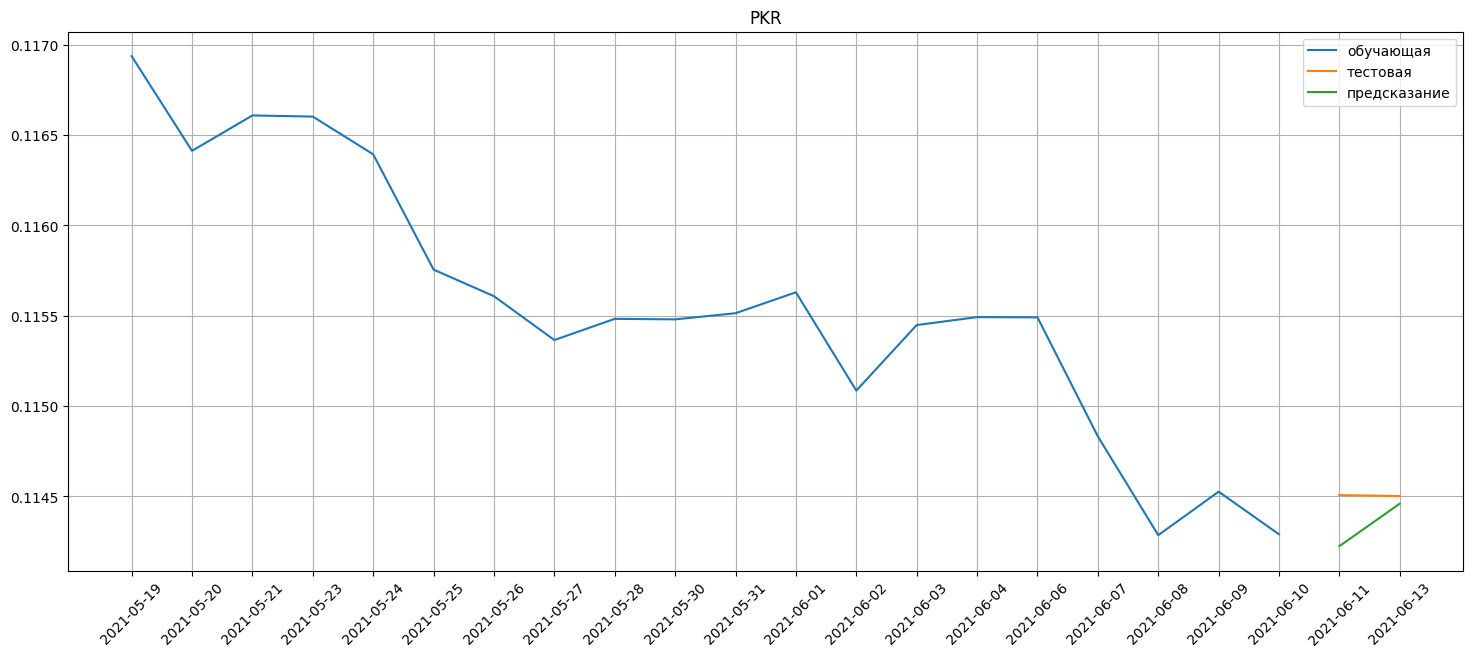


======================================== CLP ========================================
2023-11-05 22:14:37,187 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.8 MiB
2023-11-05 22:14:37,191 - ApiComposer - Initial pipeline was fitted in 16.9 sec.
2023-11-05 22:14:37,195 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 22:14:37,218 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 28 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'cut', 'diff_filter', 'ar', 'ets', 'locf', 'smoothing', 'sparse_lagged', 'lagged', 'glm', 'ts_naive_average', 'gaussian_filter', 'ransac_lin_reg', 'sgdr', 'lasso', 'adareg', 'cut', 'ar', 'ets', 'lagged', 'ransac_non_lin_reg', 'glm', 'rfr', 'polyfit', 'linear', 'dtreg', 'normalization', 'ts_naive_average', 'diff_filter', 'locf', 'pca', 'sparse_lagged', 'scaling', 'ridge', 'smoothing'].
2023-11-0

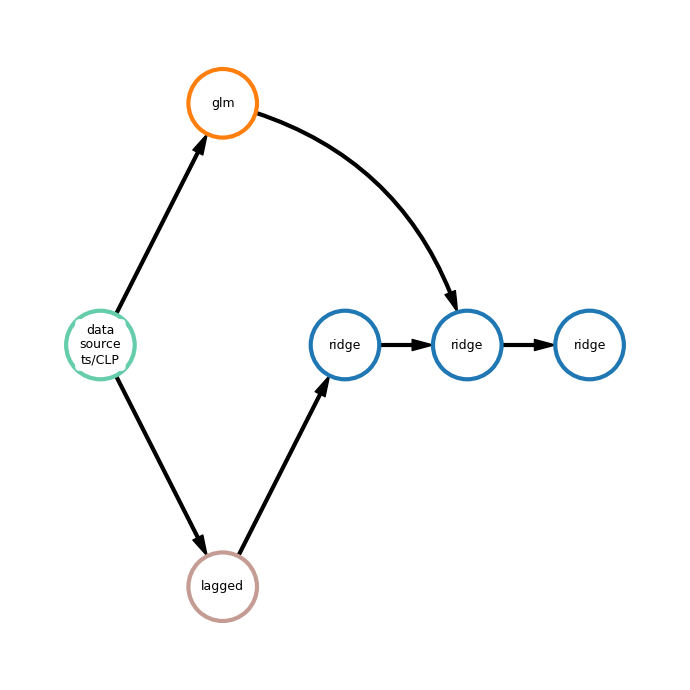

[0.02450088 0.02450128 0.0245017  0.02450198 0.02450236 0.02450286]
{'mae': 0.001, 'mape': 0.056}


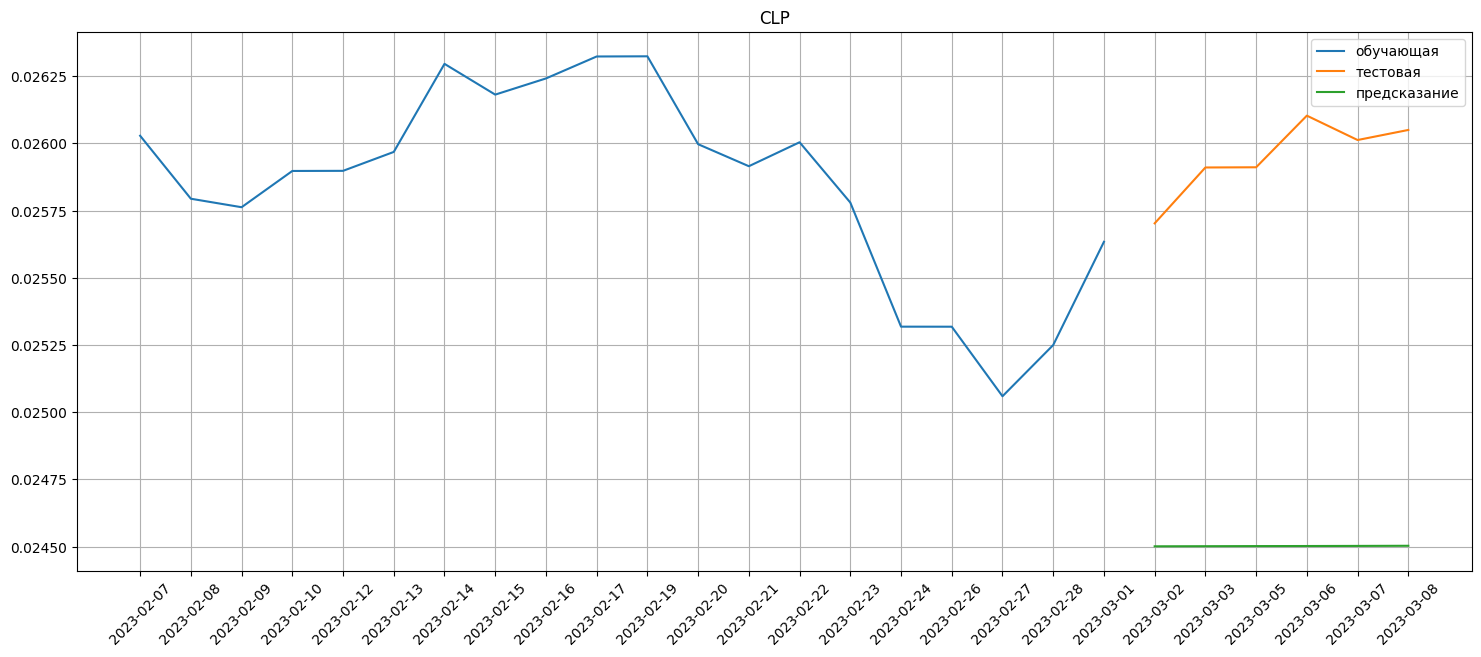


======================================== RON ========================================
2023-11-05 22:43:21,570 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-05 22:43:21,574 - ApiComposer - Initial pipeline was fitted in 11.9 sec.
2023-11-05 22:43:21,578 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-05 22:43:21,609 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 29 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'arima', 'ts_naive_average', 'cut', 'diff_filter', 'ar', 'ets', 'smoothing', 'locf', 'sparse_lagged', 'clstm', 'lagged', 'glm', 'stl_arima', 'gaussian_filter', 'ar', 'ets', 'isolation_forest_reg', 'lagged', 'rfr', 'dtreg', 'linear', 'fast_ica', 'exog_ts', 'diff_filter', 'pca', 'sparse_lagged', 'stl_arima', 'smoothing', 'ransac_lin_reg', 'arima', 'sgdr', 'lasso', 'adareg', 'cut', 'ransac_non_l

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-05 23:00:48,922 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [17:27<?, ?gen/s]

2023-11-05 23:00:48,945 - ApiComposer - Hyperparameters tuning started with 11 min. timeout


2023-11-05 23:00:58,531 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/RON, ridge, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RON - {}
ridge - {'alpha': 8.815637013287684}
lagged - {'window_size': 10} 
Initial metric: 0.017
  0%|          | 54/100000 [09:31<360:36:38, 12.99s/trial, best loss: 0.01629240465206313]
2023-11-05 23:12:28,746 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/RON, ridge, lagged]}
ridge - {'alpha': 5.06578860076007}
ridge - {'alpha': 4.07674651257627}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/RON - {}
ridge - {'alpha': 2.549603531471565}
lagged - {'window_size': 480}
2023-11-05 23:12:28,749 - PipelineTuner - Final metric: 0.016
2023-11-05 23:12:28,756 - ApiComposer - Hyperparameters tuning finished
2023-11-05 23:12:29,232 - ApiComposer - Model generation finished
2023-11-

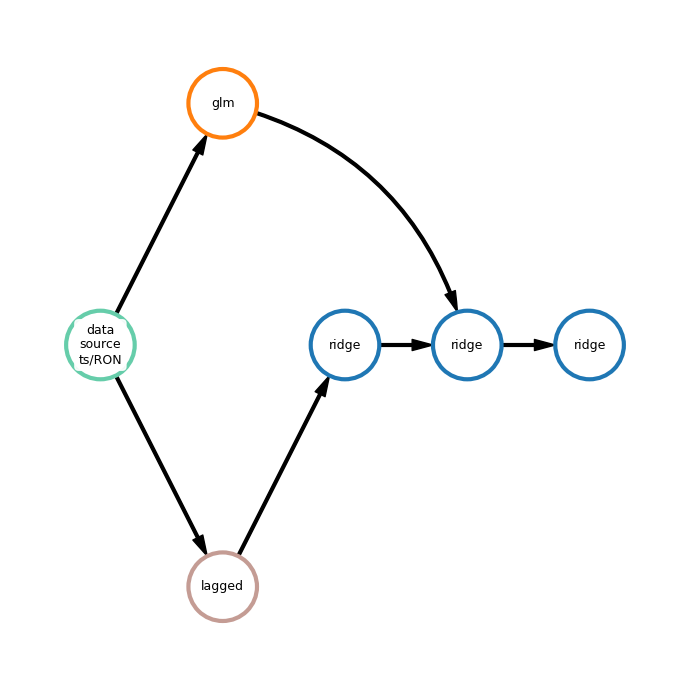

[4.32496578 4.32485633 4.32474098]
{'mae': 0.01, 'mape': 0.002}


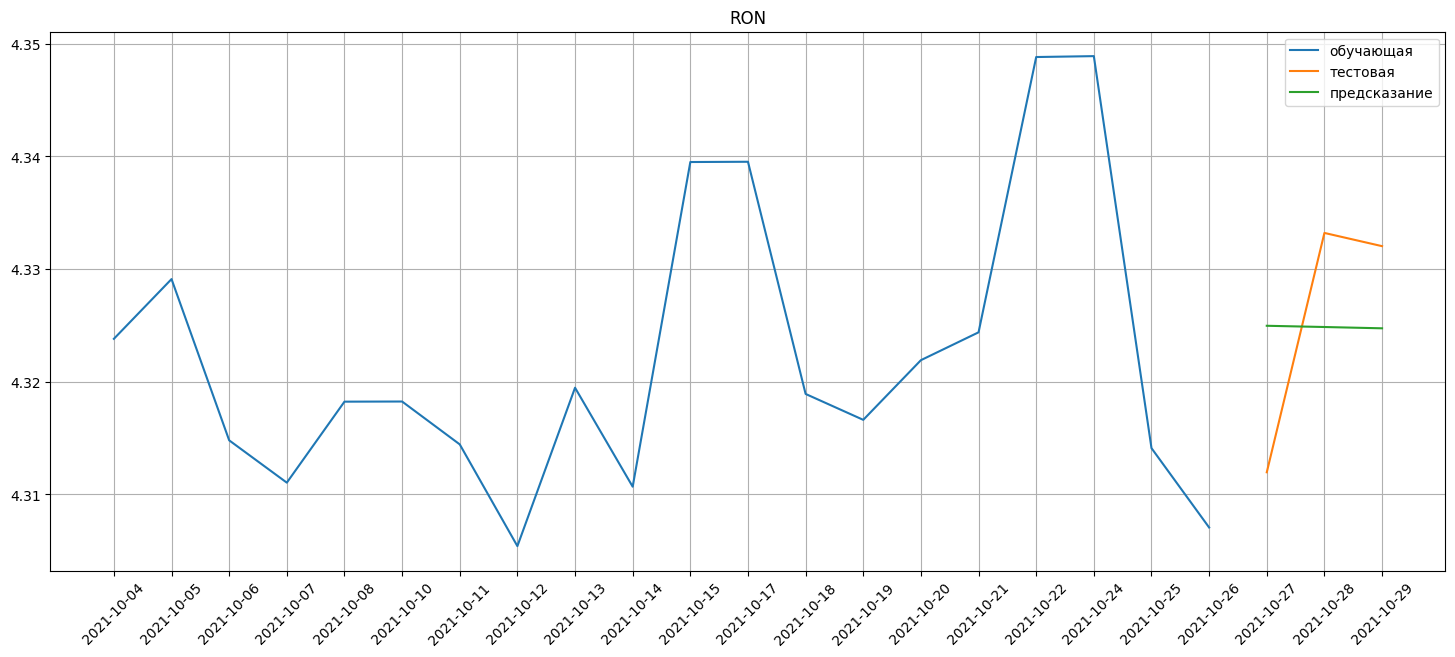


======================================== TWD ========================================
2023-11-05 23:13:00,078 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.8 MiB
2023-11-05 23:13:00,082 - ApiComposer - Initial pipeline was fitted in 10.9 sec.
2023-11-05 23:13:00,086 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-05 23:13:00,116 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 49 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'arima', 'ts_naive_average', 'cut', 'diff_filter', 'ar', 'ets', 'smoothing', 'locf', 'sparse_lagged', 'clstm', 'lagged', 'glm', 'stl_arima', 'gaussian_filter', 'ar', 'ets', 'isolation_forest_reg', 'lagged', 'rfr', 'dtreg', 'linear', 'fast_ica', 'exog_ts', 'diff_filter', 'pca', 'sparse_lagged', 'stl_arima', 'smoothing', 'ransac_lin_reg', 'arima', 'sgdr', 'lasso', 'adareg', 'cut', 'ransac_non_l

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-05 23:30:17,126 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [17:16<?, ?gen/s]

2023-11-05 23:30:17,151 - ApiComposer - Hyperparameters tuning started with 32 min. timeout


2023-11-05 23:30:25,812 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/TWD, ridge, lagged]}
ridge - {}
ridge - {'alpha': 8.828230409632027}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/TWD - {}
ridge - {'alpha': 5.129660904586778}
lagged - {'window_size': 9.09946263989087} 
Initial metric: 0.002
  0%|          | 157/100000 [30:07<340:58:30, 12.29s/trial, best loss: 0.0018674357026625841]
2023-11-06 00:02:15,353 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/TWD, ridge, lagged]}
ridge - {'alpha': 0.04082211760429799}
ridge - {'alpha': 8.057445048681846}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/TWD - {}
ridge - {'alpha': 4.312349437800933}
lagged - {'window_size': 417}
2023-11-06 00:02:15,360 - PipelineTuner - Final metric: 0.002
2023-11-06 00:02:15,374 - ApiComposer - Hyperparameters tuning finished
2023-11-06 00:02:15,804 

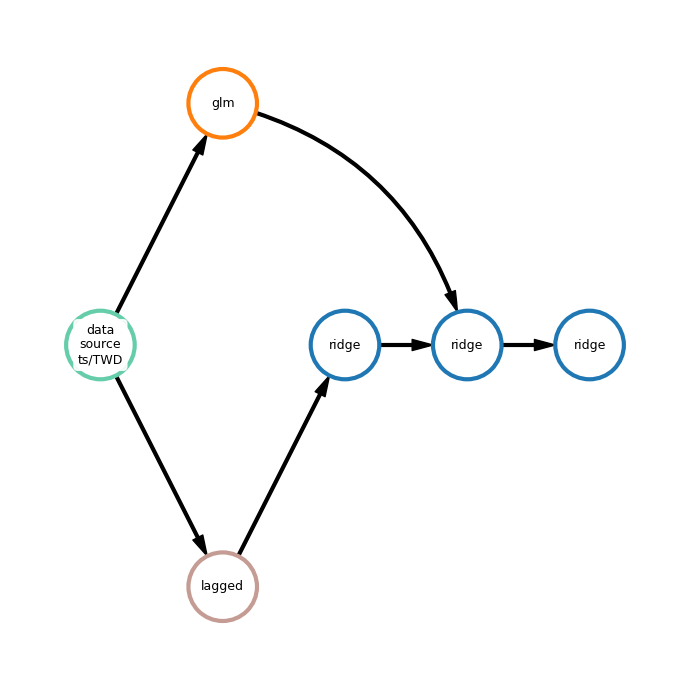

[0.65261595 0.65271507 0.65281594 0.65291429 0.65300882 0.65310086
 0.6531971  0.65329499 0.65338419 0.65348429 0.6535807  0.65367565
 0.65376822 0.65386822 0.65396456 0.65405692]
{'mae': 0.002, 'mape': 0.004}


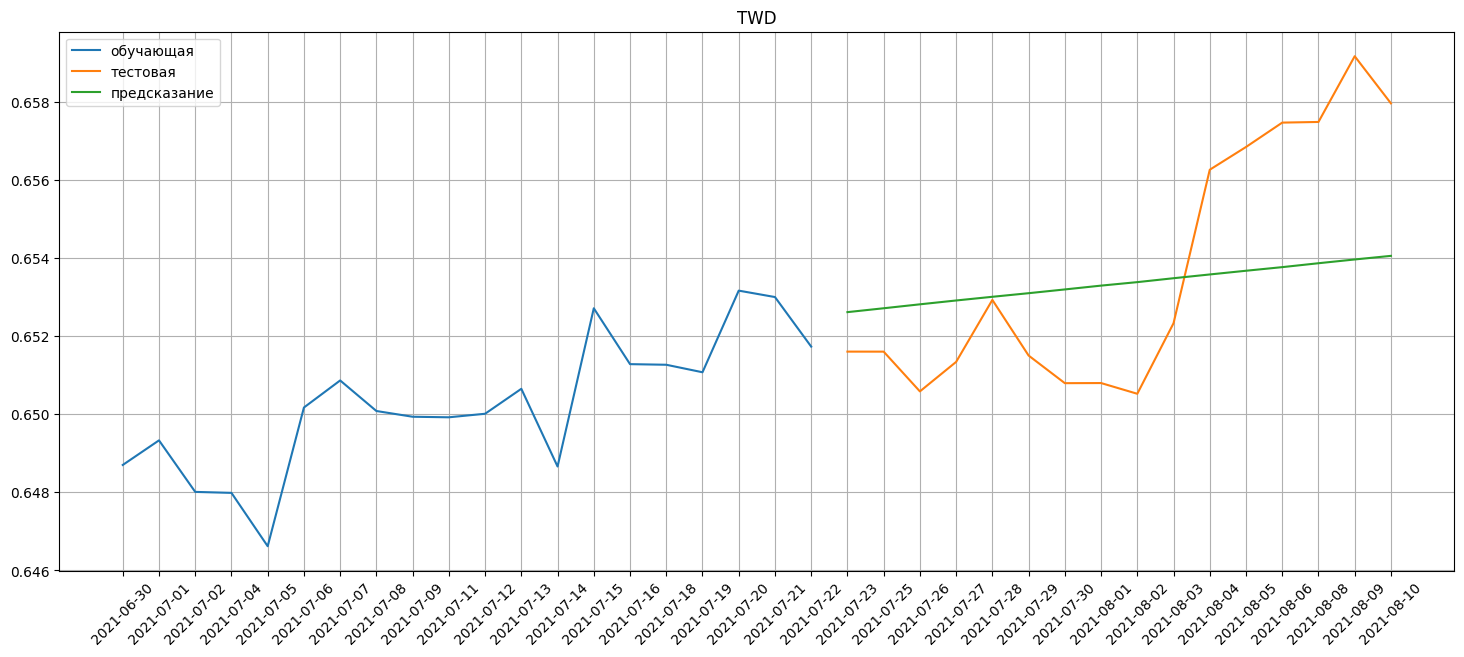


======================================== CNY ========================================
2023-11-06 00:02:44,276 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.6 MiB
2023-11-06 00:02:44,282 - ApiComposer - Initial pipeline was fitted in 9.1 sec.
2023-11-06 00:02:44,286 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-06 00:02:44,319 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 16 min. Set of candidate models: ['gaussian_filter', 'polyfit', 'arima', 'ts_naive_average', 'cut', 'diff_filter', 'ar', 'ets', 'smoothing', 'locf', 'sparse_lagged', 'clstm', 'lagged', 'glm', 'stl_arima', 'gaussian_filter', 'ar', 'ets', 'isolation_forest_reg', 'lagged', 'rfr', 'dtreg', 'linear', 'fast_ica', 'exog_ts', 'diff_filter', 'pca', 'sparse_lagged', 'stl_arima', 'smoothing', 'ransac_lin_reg', 'arima', 'sgdr', 'lasso', 'adareg', 'cut', 'ransac_non_li

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-06 00:11:57,175 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [09:12<?, ?gen/s]

2023-11-06 00:11:57,204 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-06 00:12:26,409 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [sgdr, ridge, ridge, glm, data_source_ts/CNY, gbr, lagged, linear, decompose]}
sgdr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CNY - {}
gbr - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.010
100%|██████████| 10/10 [07:03<00:00, 42.36s/trial, best loss: 0.01411428893416296]
2023-11-06 00:19:30,031 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-06 00:20:37,810 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [sgdr, ridge, ridge, glm, data_source_ts/CNY, gbr, lagged, linear, decompose]}
sgdr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CNY - {}
gbr - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-06 00:20:37,814 - PipelineTuner - Final metric: 0.010
2023-11-06 00:20:37,819 - ApiComposer - Hyper

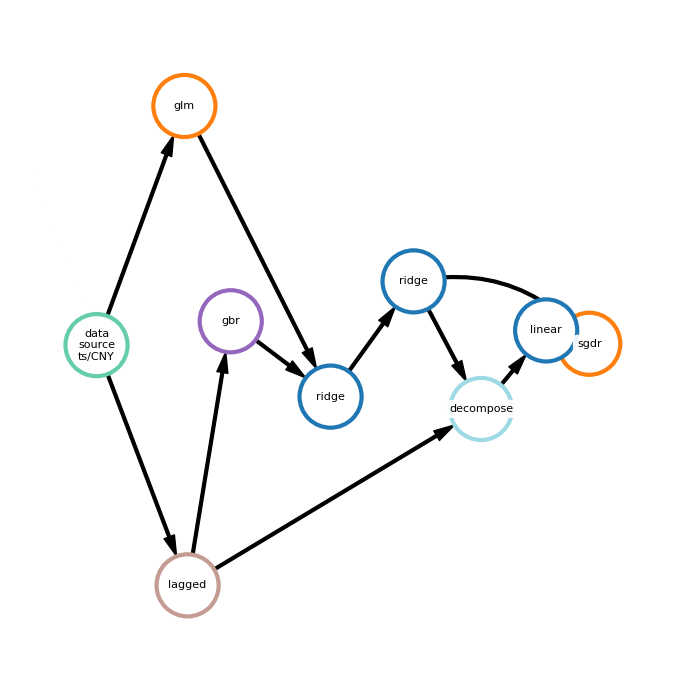

[2.74418267 2.74144298 2.74171766 2.746534   2.74310613 2.74169688
 2.74983753 2.74602605 2.74614694]
{'mae': 0.006, 'mape': 0.002}


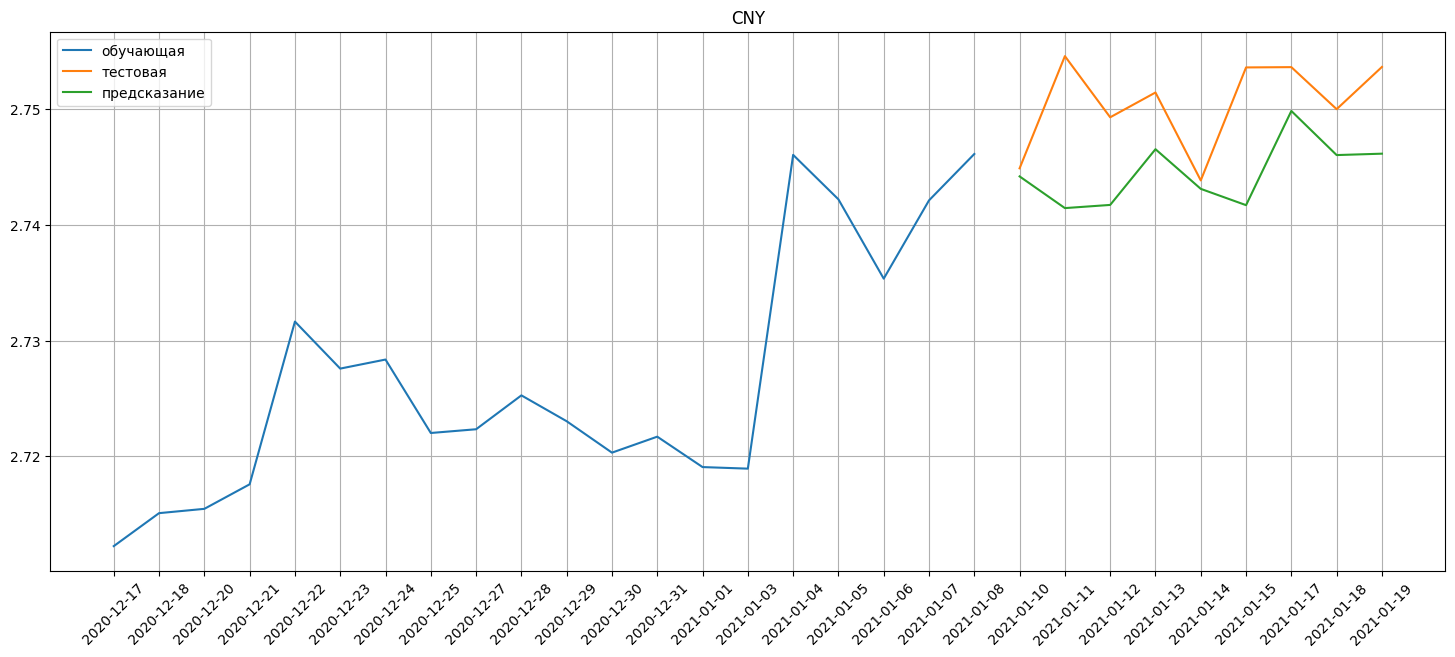

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 5*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item[plot_file] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)